In [199]:
import scipy.io
import cv2
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from numpy.linalg import svd, eig, pinv

In [162]:
#plot figures
#jupyter nbconvert --to webpdf --allow-chromium-download  C:/Users/tima-/OneDrive/Desktop/jupyter-nb/hw-3/hw3.ipynb
def plot(x_axis, y_axis, hue_list, title):
    fig, ax = plt.subplots(figsize=(5,5))
    p_prms = {'s': 5,'linewidth':0.1,'alpha':0.75}
    sns.scatterplot(ax=ax, x = x_axis, y = y_axis, hue=hue_list, **p_prms).set(title=title)
    plt.savefig('./img/'+ title +'.jpg',bbox_inches='tight')
    
def plot_position(X, title):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(Xmp[0,:])
    ax.plot(Xmp[1,:])
    ax.set_xlabel('time')
    ax.set_ylabel('axis')
    ax.legend(['z-axis','xy-axis'])
    ax.set_title(title+' bucket oscilation')
    plt.savefig('./img/'+ title +'.jpg',bbox_inches='tight')

def out_video_thershold(X,fps,name):
    movshape = X.shape
    out = cv2.VideoWriter(filename='{}.mp4'.format(name), 
                          fourcc=cv2.VideoWriter_fourcc(*'mp4v'), 
                          fps=fps, 
                          frameSize=(movshape[1],  movshape[0]),
                          isColor=False)

    for t in range(movshape[3]):
        th = 215
        frame = (X[:,:,0,t]>th)*(X[:,:,1,t]>th)*(X[:,:,2,t]>th)*255
        data = frame.astype('uint8')
        out.write(data)
    out.release()

## CLUSTERING TO LOCATE MASS POSITION

### Tracking Bucket: Ideal Case

cam1_1 movshape= (480, 640) frames= 226
cam2_1 movshape= (480, 640) frames= 284
cam3_1 movshape= (480, 640) frames= 232


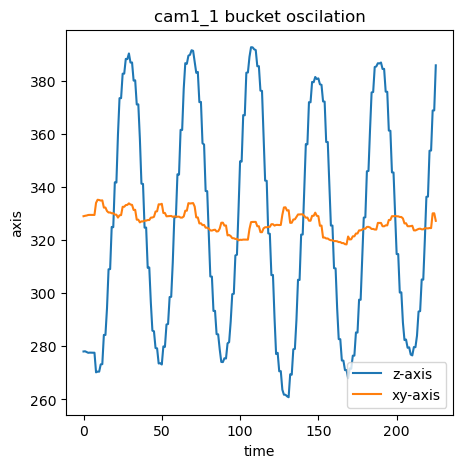

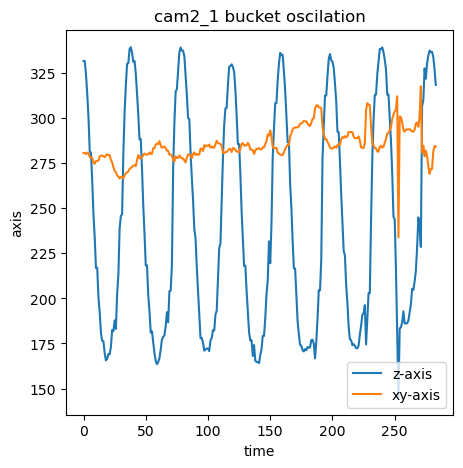

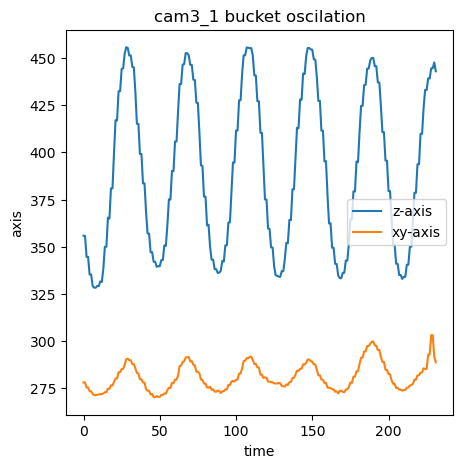

In [159]:
# TEST 1: IDEAL CASE
params = {'eps':50,'min_samples':100,'n_jobs':-2}

j=1
Xpos1 = []
for i in range(1,4):
    name = 'cam{}_{}'.format(i,j)
    mat = scipy.io.loadmat('{}.mat'.format(name))
    X = mat['vidFrames{}_{}'.format(i,j)]

    frames = X.shape[3]
    movshape = (X.shape[0], X.shape[1])
    print(name,'movshape=',movshape, 'frames=',frames)

    #thresholds to isolate bucket
    if(i==1):
        th = 225
    elif(i==2):
        th = 238
    else:
        th = 200

    Xmp = np.empty((2,frames))

    for t in range(0,frames):
        Xdb = np.argwhere((X[:,:,0,t]>th)*(X[:,:,1,t]>th)*(X[:,:,2,t]>th)== True)
        
        #density based clustering to locate bucket cluster
        db = DBSCAN(**params).fit(Xdb)
        labels = db.labels_

        #labels == -1 is the background noise points
        if (i in [3]):
            ypts = Xdb[np.argwhere(labels == 1), 0].flatten()
            xpts = Xdb[np.argwhere(labels == 1), 1].flatten()
            Xmp[:,t] = [np.mean(xpts),np.mean(ypts)]
        else:
            xpts = Xdb[np.argwhere(labels == np.max(labels)), 0].flatten()
            ypts = Xdb[np.argwhere(labels == np.max(labels)), 1].flatten()
            Xmp[:,t] = [np.mean(xpts), np.mean(ypts)]

    Xpos1.append(Xmp)
    plot_position(Xmp,title=name)


### Tracking Bucket: Noisy Case

cam1_2 movshape= (480, 640) frames= 314
cam2_2 movshape= (480, 640) frames= 356
cam3_2 movshape= (480, 640) frames= 327


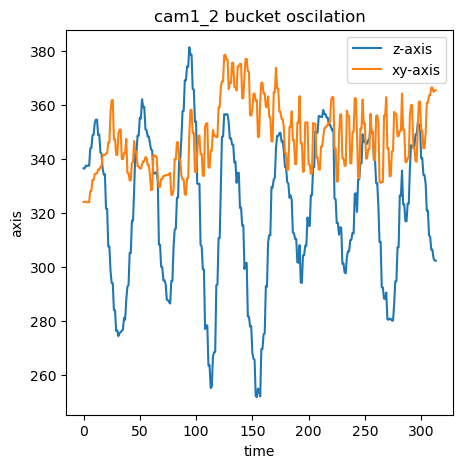

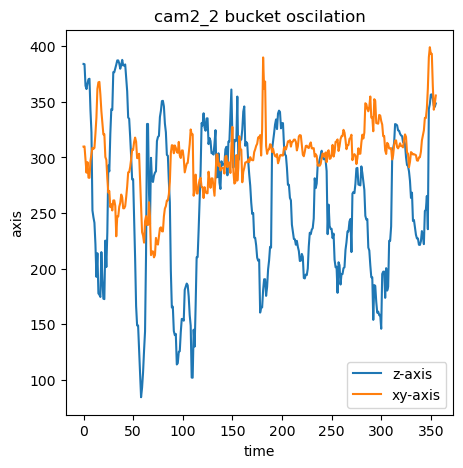

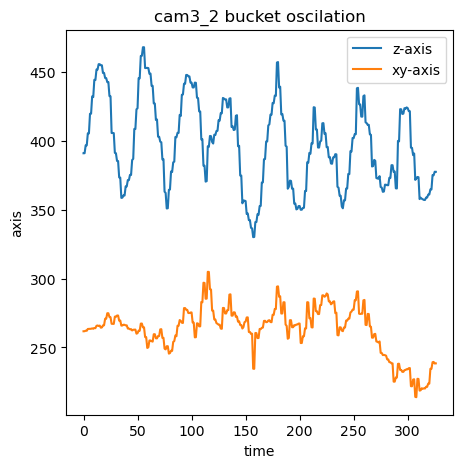

In [164]:
# TEST 2: NOISY CASE
params = {'eps':50,'min_samples':100,'n_jobs':-2}

j=2
Xpos2 = []
for i in range(1,4):
    name = 'cam{}_{}'.format(i,j)
    mat = scipy.io.loadmat('{}.mat'.format(name))
    X = mat['vidFrames{}_{}'.format(i,j)]

    frames = X.shape[3]
    movshape = (X.shape[0], X.shape[1])
    print(name,'movshape=',movshape, 'frames=',frames)

    #thresholds to isolate bucket
    if(i==1):
        th = 225
    elif(i==2):
        th = 238
    else:
        th = 200

    Xmp = np.empty((2,frames))

    for t in range(0,frames):
        Xdb = np.argwhere((X[:,:,0,t]>th)*(X[:,:,1,t]>th)*(X[:,:,2,t]>th)== True)
        
        #density based clustering to locate bucket cluster
        db = DBSCAN(**params).fit(Xdb)
        labels = db.labels_

        #labels == -1 is the background noise points
        if (i in [3]):
            ypts = Xdb[np.argwhere(labels == 1), 0].flatten()
            xpts = Xdb[np.argwhere(labels == 1), 1].flatten()
            Xmp[:,t] = [np.mean(xpts),np.mean(ypts)]
        else:
            xpts = Xdb[np.argwhere(labels == np.max(labels)), 0].flatten()
            ypts = Xdb[np.argwhere(labels == np.max(labels)), 1].flatten()
            Xmp[:,t] = [np.mean(xpts), np.mean(ypts)]

    Xpos2.append(Xmp)
    plot_position(Xmp,title=name)


## PCA 

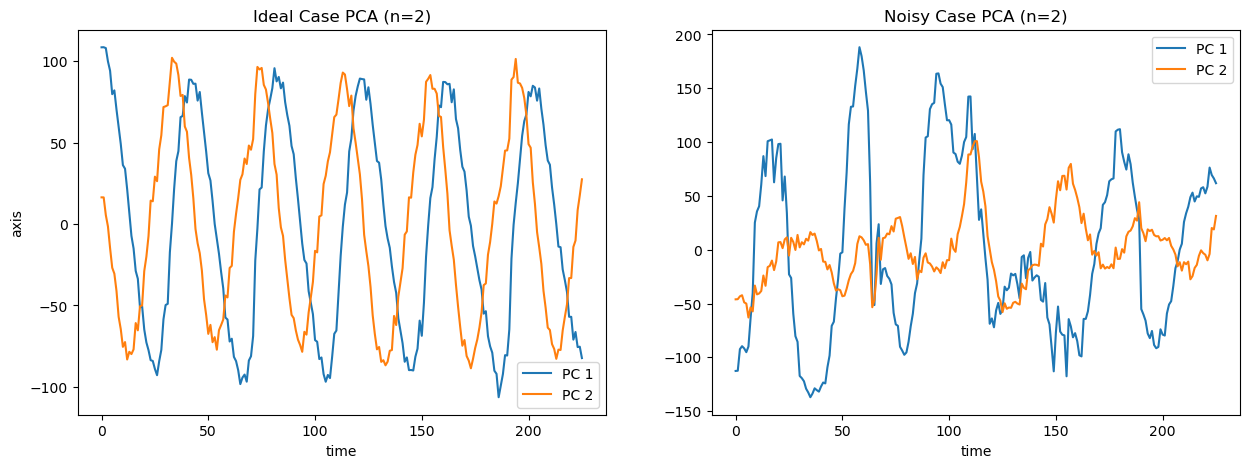

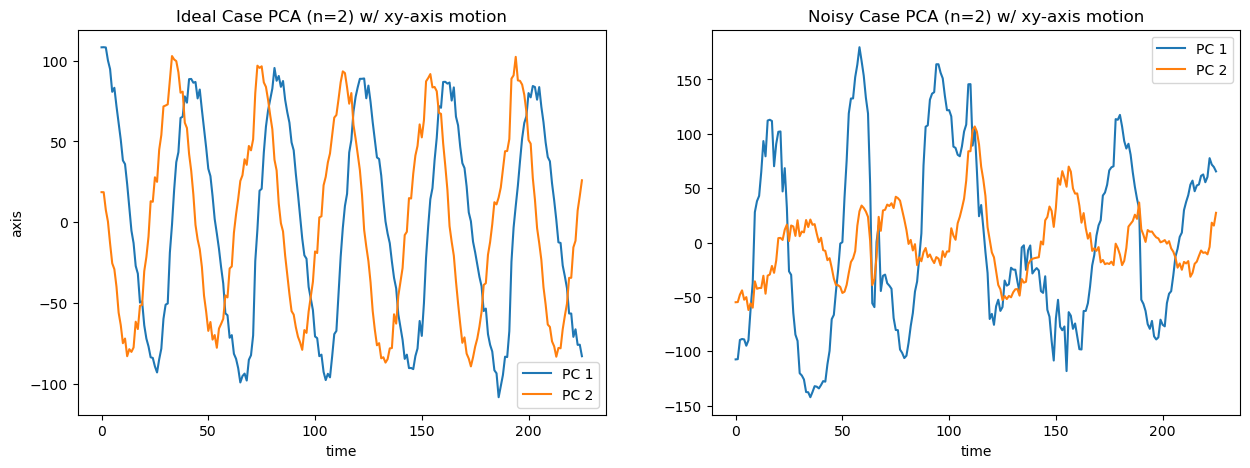

In [182]:
J1 = np.array( [Xpos1[0][0,:226], Xpos1[1][0,:226], Xpos1[2][0,:226]]).T
pca = PCA(n_components=2)
H1 = pca.fit_transform(J1)

J2 = np.array( [Xpos2[0][0,:226], Xpos2[1][0,:226], Xpos2[2][0,:226]]).T
pca = PCA(n_components=2)
H2 = pca.fit_transform(J2)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(H1[:,0])
ax[0].plot(H1[:,1])
ax[0].set_title('Ideal Case PCA (n=2)')
ax[0].set_xlabel('time')
ax[0].set_ylabel('axis')
ax[0].legend(['PC 1','PC 2'])

ax[1].plot(H2[:,0])
ax[1].plot(H2[:,1])
ax[1].set_title('Noisy Case PCA (n=2)')
ax[1].set_xlabel('time')
ax[1].legend(['PC 1','PC 2'])

J3 = np.array( [Xpos1[0][0,:226], Xpos1[1][0,:226], Xpos1[2][0,:226],
                Xpos1[0][1,:226], Xpos1[1][1,:226], Xpos1[2][1,:226]]).T
pca = PCA(n_components=2)
H3 = pca.fit_transform(J3)

J4 = np.array( [Xpos2[0][0,:226], Xpos2[1][0,:226], Xpos2[2][0,:226],
                Xpos2[0][1,:226], Xpos2[1][1,:226], Xpos2[2][1,:226]]).T
pca = PCA(n_components=2)
H4 = pca.fit_transform(J4)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(H3[:,0])
ax[0].plot(H3[:,1])
ax[0].set_title('Ideal Case PCA (n=2) w/ xy-axis motion')
ax[0].set_xlabel('time')
ax[0].set_ylabel('axis')
ax[0].legend(['PC 1','PC 2'])

ax[1].plot(H4[:,0])
ax[1].plot(H4[:,1])
ax[1].set_title('Noisy Case PCA (n=2) w/ xy-axis motion')
ax[1].set_xlabel('time')
ax[1].legend(['PC 1','PC 2'])


## SINDy Method

In [278]:
#library of functions
def z0(X):
    return(np.ones((1,X.shape[1])))
def z1(X):
    return(X[0,:])
def z2(X):
    return(X[1,:])
def z3(X):
    return(X[0,:]**2)
def z4(X):
    return(X[1,:]**2)
def z5(X):
    return(X[1,:]*X[0,:])

funclist = [z0,z1,z2,z3,z4,z5]

def SINDy(D, mode, functions, eta = 0.01, hz= 30):
    k = len(functions)
    M = D.shape[0]; N = D.shape[1]
    if mode =='disc':
        Y = D[:,1:N]
        X = D[:,0:(N-1)]
                
        # k by N-1
        Psi = np.empty((k, N-1))
        for i in range(0,k):
            Psi[i,:] = functions[i](X)

    elif mode =='cont':
        X = D[:,0:(N-1)]  # M x N-1
        Y = (D[:,1:N]- X)*hz # M x N-1
        
        # k by N-1
        Psi = np.empty((k, N-1))
        for i in range(0,k):
            Psi[i,:] = functions[i](X)
    
    elif mode =='weak':
        X = D # M x N-1
        Y = D- np.repeat(D[:,0], N).reshape(M,N) # M x N-1
        Y[:,0] = 0

        # k by N-1
        Psi = np.empty((k, N)) # k x N-1
        for i in range(0,k):
            Psi[i,:] = functions[i](X)

        Psi = np.cumsum(Psi,axis=1)/30
    
    A = []
    Psi1 = Psi.copy(); 
    Psi2 = Psi.copy(); 
    #iterating z1 variables
    print('var z1')
    c1 = True; c2 = True;
    while (c1<5):
        Psi1_dagger = pinv(Psi1) #N by K
        
        A1 = np.matmul(Y[0,:],Psi1_dagger)
        print(np.round(A1,4))
        L = np.argwhere(np.abs(A1)<eta).flatten().tolist()
        print(L)
        Psi1 = np.delete(Psi1, L, axis = 0)
        c1+=1
        if len(L)==0:
            break
    
    #iterating z2 variables
    print('var z2')
    while (c2<5):
        Psi2_dagger = pinv(Psi2) #N by K
        
        A2 = np.matmul(Y[1,:],Psi2_dagger)
        print(np.round(A2,4))
        L = np.argwhere(np.abs(A2)<eta).flatten().tolist()
        print(L)
        Psi2 = np.delete(Psi2, L, axis = 0)
        c2+=1
        if len(L)==0:
            break
                    
    A.append(A1); A.append(A2);   
    return A

# EDMD 
def eDMD(D, mode, functions, eta = 0.01, hz= 30):
    k = len(functions)
    M = D.shape[0]; N = D.shape[1]
    if mode =='disc':
        Y = D[:,1:N]
        X = D[:,0:(N-1)]
                
        # k by N-1
        Psi = np.empty((k, N-1))
        for i in range(0,k):
            Psi[i,:] = functions[i](X)

    elif mode =='cont':
        X = D[:,0:(N-1)]  # M x N-1
        Y = (D[:,1:N]- X)*hz # M x N-1
        
        # k by N-1
        Psi = np.empty((k, N-1))
        for i in range(0,k):
            Psi[i,:] = functions[i](X)
    
    elif mode =='weak':
        X = D # M x N-1
        Y = D- np.repeat(D[:,0], N).reshape(M,N) # M x N-1
        Y[:,0] = 0

        # k by N-1
        Psi = np.empty((k, N)) # k x N-1
        for i in range(0,k):
            Psi[i,:] = functions[i](X)
        Psi = np.cumsum(Psi,axis=1)/30

    Psi_dagger = pinv(Psi) #N by K
    A = np.matmul(Y,Psi_dagger)
    A[np.abs(A)<eta]=0 
    return A

### Ideal case SINDy computation with discrete mode


In [269]:
print('lambda = 0.01')
A = SINDy(H1.T, mode='disc', functions=funclist)

print('lambda = 0.1')
A = SINDy(H1.T, mode='disc', functions=funclist, eta=0.1)

lambda = 0.01
var z1
[ 9.50469777e-01  9.84940689e-01  1.73387812e-01 -6.27912333e-04
  2.39051504e-04 -5.99157713e-04]
[3, 4, 5]
[-0.82160283  0.97932085  0.16134033]
[]
[-0.82160283  0.97932085  0.16134033]
var z2
[ 2.91533855e+00 -1.41885166e-01  9.87997172e-01 -5.22768828e-04
 -2.08869553e-04  3.93145196e-04]
[3, 4, 5]
[ 0.09738673 -0.13774801  0.98110155]
[]
[ 0.09738673 -0.13774801  0.98110155]
lambda = 0.1
var z1
[ 9.50469777e-01  9.84940689e-01  1.73387812e-01 -6.27912333e-04
  2.39051504e-04 -5.99157713e-04]
[3, 4, 5]
[-0.82160283  0.97932085  0.16134033]
[]
[-0.82160283  0.97932085  0.16134033]
var z2
[ 2.91533855e+00 -1.41885166e-01  9.87997172e-01 -5.22768828e-04
 -2.08869553e-04  3.93145196e-04]
[3, 4, 5]
[ 0.09738673 -0.13774801  0.98110155]
[0]
[-0.13773924  0.98109793]
[]
[-0.13773924  0.98109793]


### Noisy case SINDy computation with discrete mode


In [270]:
print('lambda = 0.01')
A = SINDy(H2.T, mode='disc', functions=funclist)
print('lambda = 0.1')
A = SINDy(H2.T, mode='disc', functions=funclist,eta=0.1)

lambda = 0.01
var z1
[-2.29796573e+00  9.63650898e-01 -2.85711716e-01  1.22921269e-04
  2.12594849e-03 -1.03177686e-03]
[3, 4, 5]
[ 0.73238062  0.96178252 -0.23191389]
[]
[ 0.73238062  0.96178252 -0.23191389]
var z2
[-1.63884465e-01  1.56175904e-02  9.38379467e-01  3.80987721e-05
  2.40243531e-04 -6.11149420e-06]
[3, 4, 5]
[0.34121794 0.01650447 0.94489502]
[]
[0.34121794 0.01650447 0.94489502]
lambda = 0.1
var z1
[-2.29796573e+00  9.63650898e-01 -2.85711716e-01  1.22921269e-04
  2.12594849e-03 -1.03177686e-03]
[3, 4, 5]
[ 0.73238062  0.96178252 -0.23191389]
[]
[ 0.73238062  0.96178252 -0.23191389]
var z2
[-1.63884465e-01  1.56175904e-02  9.38379467e-01  3.80987721e-05
  2.40243531e-04 -6.11149420e-06]
[1, 3, 4, 5]
[0.33666734 0.94475615]
[]
[0.33666734 0.94475615]


###  Ideal and Noisy Case SINDy model dynamics - discrete mode

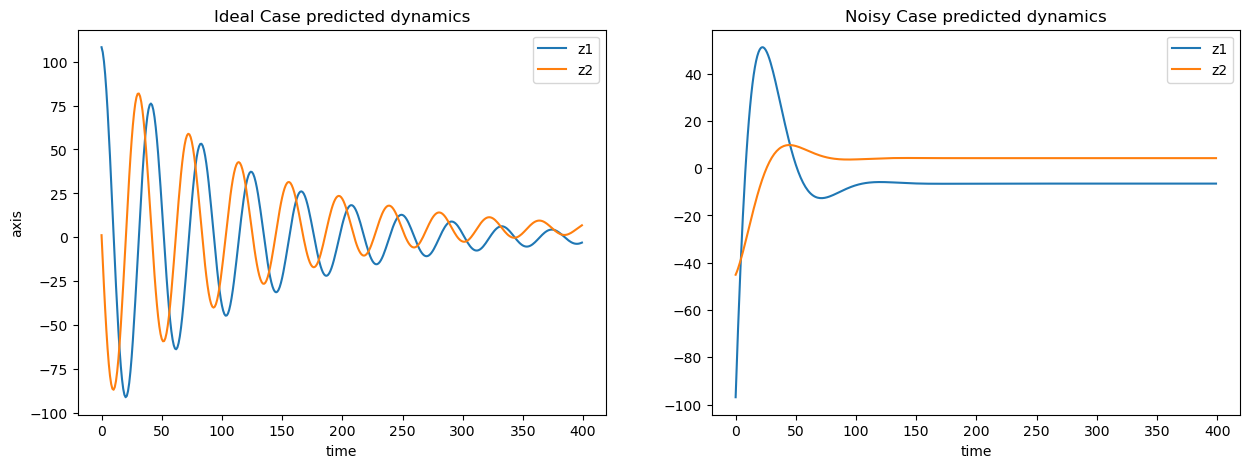

In [271]:
Z1 = []; Z2 = []
z1 = H1[0,0]; z2 = H1[0,1] #initial conditions

for t in range(0,400):
    q1 = -0.82160283 + 0.97932085*z1 + 0.16134033*z2
    q2 = 0.09738673 + -0.13774801*z1 + 0.98110155*z2
    Z1.append(q1); Z2.append(q2)
    z1 = q1; z2 = q2

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(Z1)
ax[0].plot(Z2)
ax[0].set_title('Ideal Case predicted dynamics')
ax[0].set_xlabel('time')
ax[0].set_ylabel('axis')
ax[0].legend(['z1','z2'])

Z1 = []; Z2 = []
z1 = H2[0,0]; z2 = H2[0,1] #initial conditions

for t in range(0,400):
    q1 = 0.73238062 +  0.96178252*z1 + -0.23191389*z2
    q2 = 0.34121794 + 0.01650447*z1 + 0.94489502*z2
    Z1.append(q1); Z2.append(q2)
    z1 = q1; z2 = q2

ax[1].plot(Z1)
ax[1].plot(Z2)
ax[1].set_title('Noisy Case predicted dynamics')
ax[1].set_xlabel('time')
ax[1].legend(['z1','z2'])


### Ideal case  SINDy computation with continuous time weak formulation mode

In [281]:
print('lambda = 0.1')
A = SINDy(H1.T, mode='weak', functions=funclist, eta=0.1)

lambda = 0.1
var z1
[ 7.62628e+01  1.35300e-01  5.31160e+00 -3.80000e-02  1.61000e-02
 -1.04000e-02]
[3, 4, 5]
[-28.7683  -0.5087   5.0811]
[]
var z2
[-5.517842e+02 -4.272400e+00 -1.715000e+00  7.730000e-02  7.080000e-02
  1.430000e-02]
[3, 4, 5]
[ 3.6432 -3.2362 -0.3326]
[]


### Noisy case  SINDy computation with continuous time weak formulation mode


In [282]:
print('lambda = 0.1')
A = SINDy(H2.T, mode='weak', functions=funclist, eta=0.1)

lambda = 0.1
var z1
[-1.00747e+01  8.59000e-01 -5.64820e+00 -8.00000e-04  3.12000e-02
 -6.47000e-02]
[3, 4, 5]
[14.2834 -0.1443 -2.9531]
[]
var z2
[-2.12479e+01  2.78400e-01 -1.33180e+00  1.70000e-03  1.55000e-02
 -1.45000e-02]
[3, 4, 5]
[ 7.9654  0.1555 -0.8283]
[]


### EDMD method trial

In [249]:
A = eDMD(H1.T, mode='disc', functions=funclist)
A

array([[ 0.95046978,  0.98494069,  0.17338781,  0.        ,  0.        ,
         0.        ],
       [ 2.91533855, -0.14188517,  0.98799717,  0.        ,  0.        ,
         0.        ]])

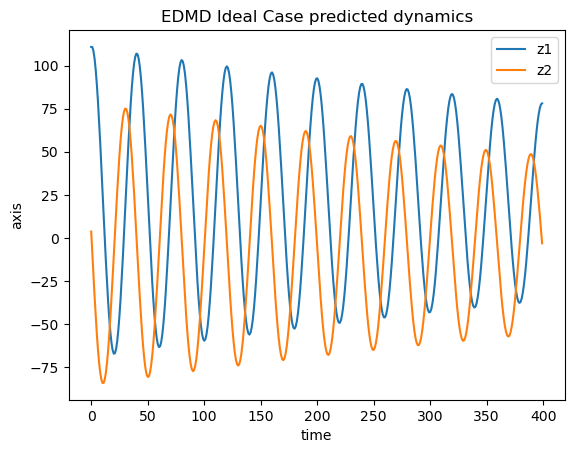

In [266]:
Z1 = []; Z2 = []
z1 = H1[0,0]; z2 = H1[0,1] #initial conditions

for t in range(0,400):
    q1 = 0.95046978 + 0.98494069*z1 + 0.17338781*z2
    q2 = 2.91533855 + -0.14188517*z1 + 0.98799717*z2
    Z1.append(q1); Z2.append(q2)
    z1 = q1; z2 = q2

plt.plot(Z1)
plt.plot(Z2)
plt.title('EDMD Ideal Case predicted dynamics')
plt.xlabel('time')
plt.ylabel('axis')
plt.legend(['z1','z2'])